In [147]:
import pandas as pd
import sklearn as sk
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('../dataFiles/ExoPlanetTrain.csv',index_col=0)

In [149]:
df.head(20)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
LABEL,,,,,,,,,,,,,,,,,,,,,
2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,139.34,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,40.10,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,110.19,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,11.55,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65


In [150]:
labels = df.index
labels

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='LABEL', length=5087)

## Assign the mean/median/std/max/min/skew of the entire dataset and graph each of them

In [151]:
means = df.mean(axis=1)
medians = df.median(axis=1)
std = df.std(axis=1)
maxval = df.max(axis=1)
minval = df.min(axis=1)
skew = df.skew(axis=1)

Text(0, 0.5, 'Num. of Stars')

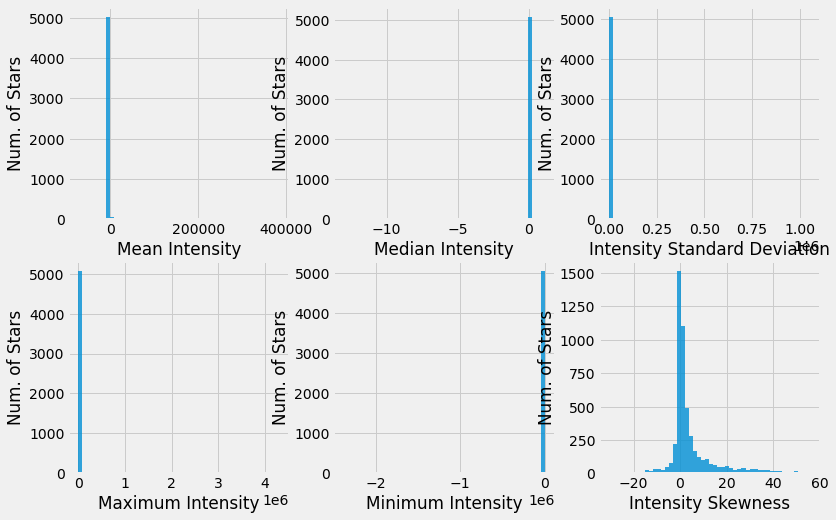

In [152]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(231)
ax.hist(means,alpha=0.8,bins=50)
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(232)
ax.hist(medians,alpha=0.8,bins=50)
ax.set_xlabel('Median Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(233)
ax.hist(std,alpha=0.8,bins=50)
ax.set_xlabel('Intensity Standard Deviation')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(234)
ax.hist(maxval,alpha=0.8,bins=50)
ax.set_xlabel('Maximum Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(235)
ax.hist(minval,alpha=0.8,bins=50)
ax.set_xlabel('Minimum Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(236)
ax.hist(skew,alpha=0.8,bins=50)
ax.set_xlabel('Intensity Skewness')
ax.set_ylabel('Num. of Stars')

## Assign the mean/median/std/max/min/skew of Exoplanets to a variable and of Non-exoplanets to another variable and then graph them on the same charts

In [153]:
means1 = df[labels==1].mean(axis=1)
medians1 = df[labels==1].median(axis=1)
std1 = df[labels==1].std(axis=1)
maxval1 = df[labels==1].max(axis=1)
minval1 = df[labels==1].min(axis=1)
skew1 = df[labels==1].skew(axis=1)

means2 = df[labels==2].mean(axis=1)
medians2 = df[labels==2].median(axis=1)
std2 = df[labels==2].std(axis=1)
maxval2 = df[labels==2].max(axis=1)
minval2 = df[labels==2].min(axis=1)
skew2 = df[labels==2].skew(axis=1)

Text(0, 0.5, 'Num. of Stars')

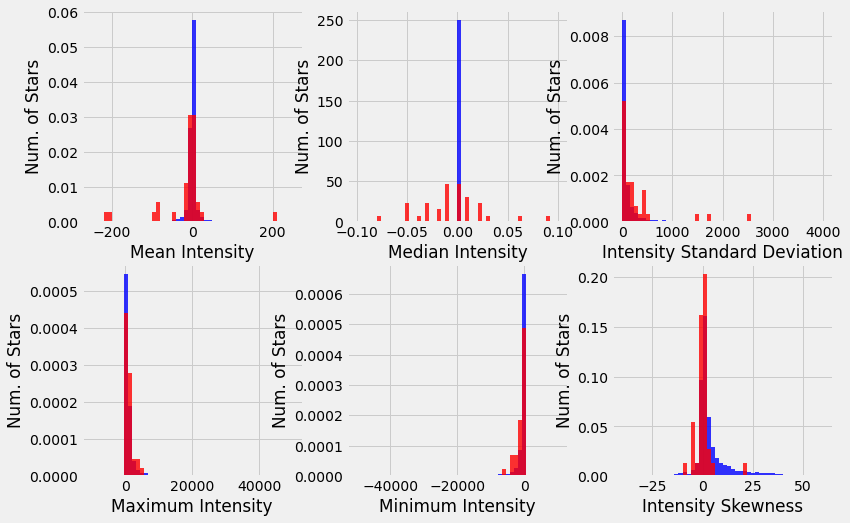

In [154]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(231)
ax.hist(means1,alpha=0.8,bins=50,color='b',density=True,range=(-250,250))
ax.hist(means2,alpha=0.8,bins=50,color='r',density=True,range=(-250,250))
ax.get_legend()
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(232)
ax.hist(medians1,alpha=0.8,bins=50,color='b',density=True,range=(-0.1,0.1))
ax.hist(medians2,alpha=0.8,bins=50,color='r',density=True,range=(-0.1,0.1))
ax.get_legend()
ax.set_xlabel('Median Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(233)    
ax.hist(std1,alpha=0.8,bins=50,density=True,color='b',range=(0,4000))
ax.hist(std2,alpha=0.8,bins=50,density=True,color='r',range=(0,4000))
ax.get_legend()
ax.set_xlabel('Intensity Standard Deviation')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(234)
ax.hist(maxval1,alpha=0.8,bins=50,density=True,color='b',range=(-10000,50000))
ax.hist(maxval2,alpha=0.8,bins=50,density=True,color='r',range=(-10000,50000))
ax.get_legend()
ax.set_xlabel('Maximum Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(235)
ax.hist(minval1,alpha=0.8,bins=50,density=True,color='b',range=(-50000,10000))
ax.hist(minval2,alpha=0.8,bins=50,density=True,color='r',range=(-50000,10000))
ax.get_legend()
ax.set_xlabel('Minimum Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(236)
ax.hist(skew1,alpha=0.8,bins=50,density=True,color='b',range=(-40,60))
ax.hist(skew2,alpha=0.8,bins=50,density=True,color='r',range=(-40,60)) 
ax.get_legend()
ax.set_xlabel('Intensity Skewness')
ax.set_ylabel('Num. of Stars')

In [155]:
df[labels==1].median(axis=1).describe()

count    5050.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

## Visualization of the known 37 Exoplanet stars

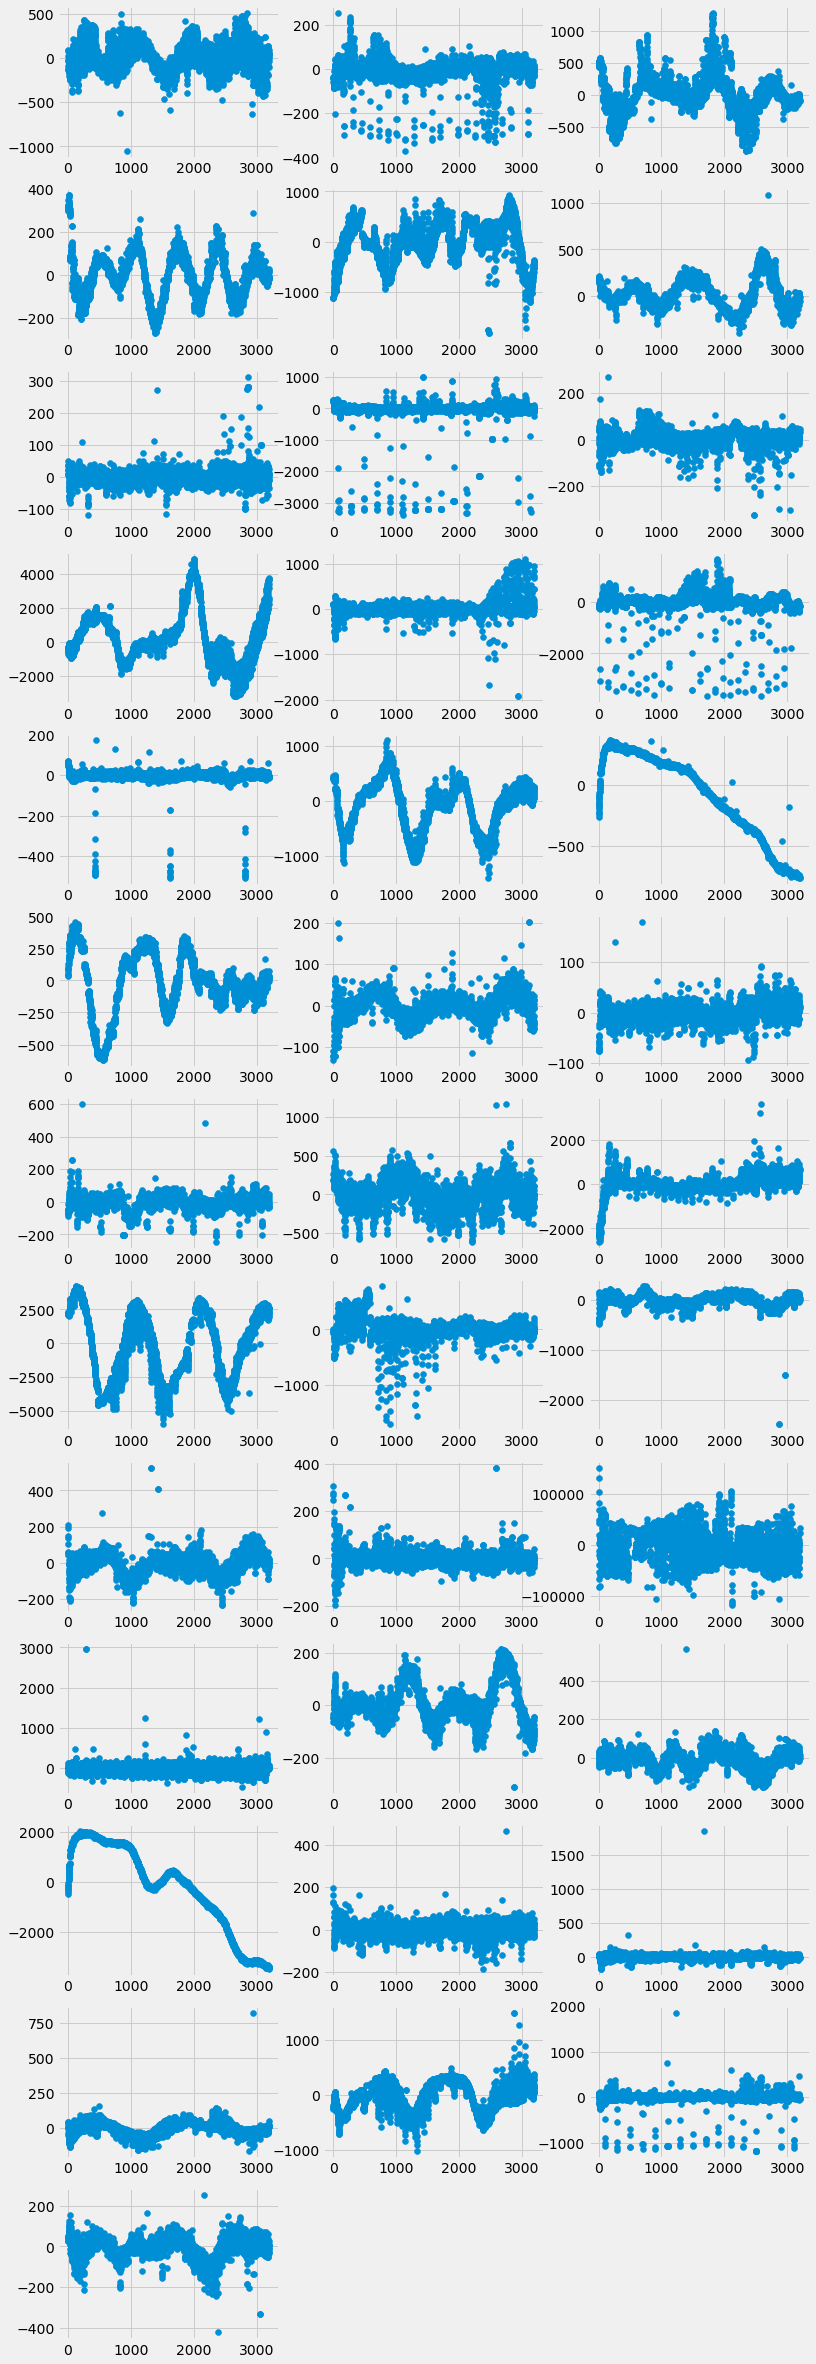

In [156]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==2].iloc[i,:])

## Visualization of the first 37 Non-exoplanet stars

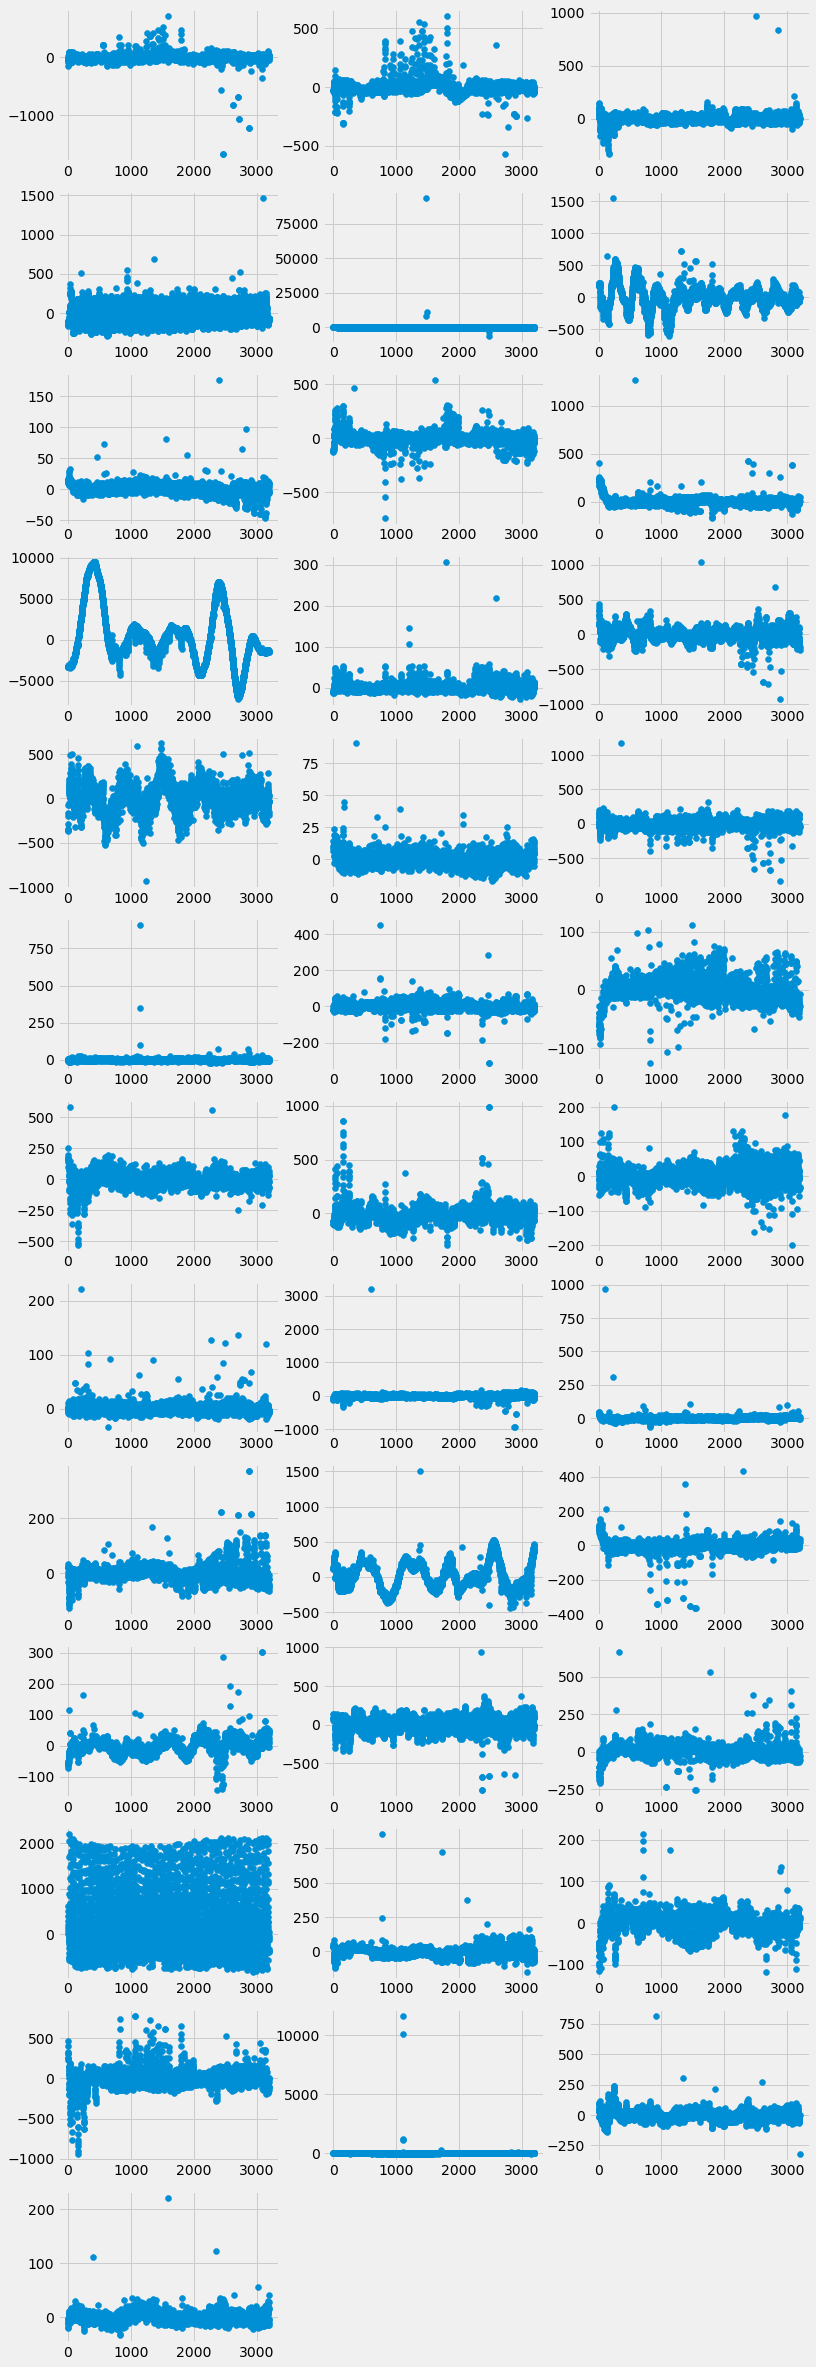

In [157]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==1].iloc[i,:])

## Imports

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, \
BatchNormalization, Input, concatenate, Activation
from tensorflow.keras.optimizers import Adam
from scipy.ndimage import uniform_filter1d

In [159]:
INPUT_LIB = '../dataFiles/'
raw_data = np.loadtxt(INPUT_LIB + 'ExoPlanetTrain.csv', skiprows=1, delimiter=',')
raw_data1 = np.loadtxt(INPUT_LIB + 'ExoPlanetTest.csv', skiprows=1, delimiter=',')

In [160]:
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis] - 1.

x_test = raw_data1[:, 1:]
y_test = raw_data1[:, 0, np.newaxis] - 1.

## Splitting data into train/test

In [161]:
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

In [162]:
x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2)
x_test = np.stack([x_test, uniform_filter1d(x_test, axis=1, size=200)], axis=2)

## Building the model

In [163]:
model = Sequential()
model.add(Conv1D(filters=8, kernel_size=11, activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
def batch_generator(x_train, y_train, batch_size=32):
    """
    Gives equal number of positive and negative samples, and rotates them randomly in time
    """
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
    
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch

## Fitting the model

In [165]:
#Start with a slightly lower learning rate, to ensure convergence
#model.compile(optimizer=Adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
#hist = model.fit(batch_generator(x_train, y_train, 32), 
#                           validation_data=(x_test, y_test), 
#                           verbose=2, epochs=5,
#                           steps_per_epoch=x_train.shape[1]//32)

In [166]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    #min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [167]:
#Then speed things up a little
model.compile(optimizer=Adam(4e-5), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=2, epochs=125,
                           steps_per_epoch=x_train.shape[1]//32)

Epoch 1/125
99/99 - 4s - loss: 0.7548 - accuracy: 0.4934 - val_loss: 0.6840 - val_accuracy: 0.5421
Epoch 2/125
99/99 - 3s - loss: 0.7206 - accuracy: 0.5357 - val_loss: 0.6653 - val_accuracy: 0.6070
Epoch 3/125
99/99 - 3s - loss: 0.6932 - accuracy: 0.5685 - val_loss: 0.6593 - val_accuracy: 0.6158
Epoch 4/125
99/99 - 3s - loss: 0.6931 - accuracy: 0.5865 - val_loss: 0.6262 - val_accuracy: 0.7211
Epoch 5/125
99/99 - 3s - loss: 0.6769 - accuracy: 0.5777 - val_loss: 0.6245 - val_accuracy: 0.7263
Epoch 6/125
99/99 - 3s - loss: 0.6568 - accuracy: 0.6130 - val_loss: 0.6240 - val_accuracy: 0.7316
Epoch 7/125
99/99 - 3s - loss: 0.6275 - accuracy: 0.6521 - val_loss: 0.6220 - val_accuracy: 0.7333
Epoch 8/125
99/99 - 3s - loss: 0.6262 - accuracy: 0.6676 - val_loss: 0.5910 - val_accuracy: 0.7684
Epoch 9/125
99/99 - 3s - loss: 0.5977 - accuracy: 0.6831 - val_loss: 0.5788 - val_accuracy: 0.7754
Epoch 10/125
99/99 - 3s - loss: 0.6071 - accuracy: 0.6821 - val_loss: 0.5745 - val_accuracy: 0.7877
Epoch 11/

99/99 - 3s - loss: 0.1182 - accuracy: 0.9542 - val_loss: 0.1705 - val_accuracy: 0.9491
Epoch 84/125
99/99 - 3s - loss: 0.1199 - accuracy: 0.9583 - val_loss: 0.1633 - val_accuracy: 0.9509
Epoch 85/125
99/99 - 3s - loss: 0.1128 - accuracy: 0.9574 - val_loss: 0.1535 - val_accuracy: 0.9544
Epoch 86/125
99/99 - 3s - loss: 0.1268 - accuracy: 0.9599 - val_loss: 0.1485 - val_accuracy: 0.9579
Epoch 87/125
99/99 - 3s - loss: 0.1264 - accuracy: 0.9552 - val_loss: 0.1647 - val_accuracy: 0.9474
Epoch 88/125
99/99 - 3s - loss: 0.1152 - accuracy: 0.9596 - val_loss: 0.1391 - val_accuracy: 0.9544
Epoch 89/125
99/99 - 3s - loss: 0.1034 - accuracy: 0.9624 - val_loss: 0.1549 - val_accuracy: 0.9526
Epoch 90/125
99/99 - 3s - loss: 0.1111 - accuracy: 0.9593 - val_loss: 0.1498 - val_accuracy: 0.9544
Epoch 91/125
99/99 - 3s - loss: 0.1247 - accuracy: 0.9621 - val_loss: 0.1505 - val_accuracy: 0.9544
Epoch 92/125
99/99 - 3s - loss: 0.1096 - accuracy: 0.9615 - val_loss: 0.1522 - val_accuracy: 0.9579
Epoch 93/125


Minimum Validation Loss: 0.0993


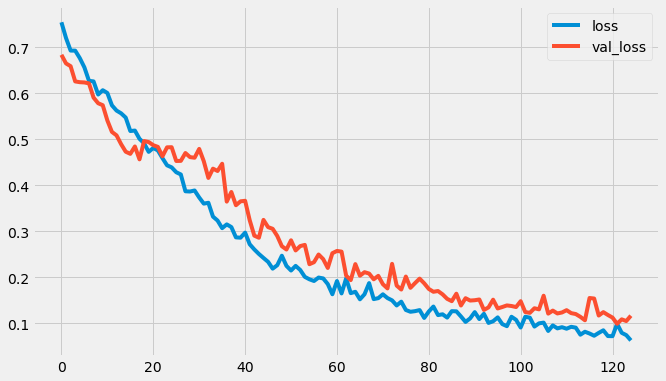

In [168]:
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

## Predicting with the model

In [169]:
non_idx = np.where(y_test[:,0] == 0.)[0]
yes_idx = np.where(y_test[:,0] == 1.)[0]
y_hat = model.predict(x_test)[:,0]

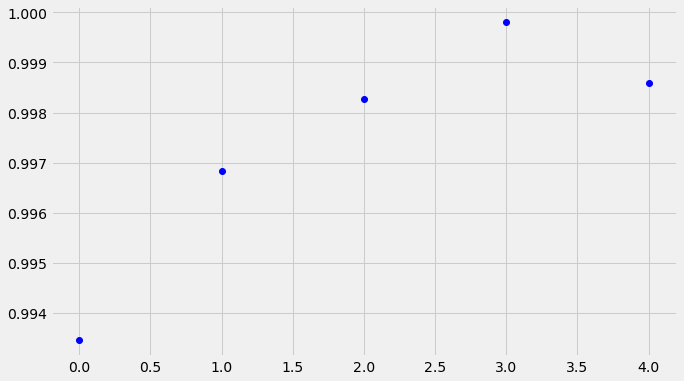

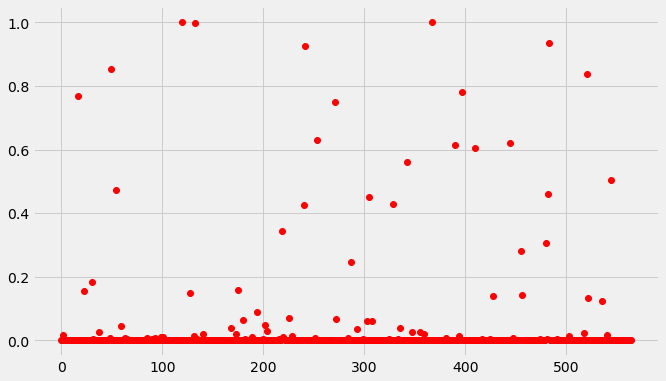

In [170]:
plt.plot([y_hat[i] for i in yes_idx], 'bo')
plt.show()
plt.plot([y_hat[i] for i in non_idx], 'ro')
plt.show()

#### not sure why this graph is suddently different than the one our powerpoint

## Validation/Training Accuracy

In [171]:
history2 = model.evaluate(x_test, y_test)
print(history2)

18/18 [==============================] - 0s 7ms/step - loss: 0.1169 - accuracy: 0.9719
[0.11686026304960251, 0.9719298481941223]
